In [1]:
import pandas as pd
import sqlite3
import math
import datetime 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [2]:

conn = sqlite3.connect('database.db')

In [3]:
c = conn.cursor()


In [4]:
c.executescript('drop table if exists kota')
c.executescript('drop table if exists pelanggan')
c.executescript('drop table if exists barang')
c.executescript('drop table if exists penjualan')
c.execute("CREATE TABLE IF NOT EXISTS 'kota' ('id' INT, 'kota' VARCHAR(255) NULL, 'provinsi' VARCHAR(255) NULL, PRIMARY KEY ('id'))")
c.execute("CREATE TABLE IF NOT EXISTS 'pelanggan' ('id' INT, 'nama_customer' VARCHAR(255) NULL,'kota_id' INT NOT NULL, PRIMARY KEY ('id'), FOREIGN KEY ('kota_id') REFERENCES 'kota' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION)")
c.execute("CREATE TABLE IF NOT EXISTS 'barang' ( 'id' INT, 'nama_barang' VARCHAR(255) NULL, 'harga_beli' FLOAT NULL, 'harga_jual' FLOAT NULL, 'jenis' VARCHAR(255), 'merk' VARCHAR(255), PRIMARY KEY ('id'))")
c.execute("CREATE TABLE IF NOT EXISTS 'penjualan' ( 'id', 'tanggal_penjualan' DATE NULL, 'jumlah_beli' INT NULL, 'pelanggan_id' INT NOT NULL,'barang_id' INT NOT NULL, PRIMARY KEY ('id'), FOREIGN KEY ('pelanggan_id') REFERENCES 'pelanggan' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('barang_id') REFERENCES 'barang' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION)")


In [5]:
df = pd.read_csv("bismillah.csv")
df

,id,tanggal jual,nama customer,kota,provinsi,nama barang,merk,jenis,harga beli,harga jual,jumlah beli
0,1.0,1212122020年1月6日,Achmad Yusril,Surabaya,jawa timur,lampu depan,fdr,accessories,10000.0,15000.0,1.0
1,2.0,1212122020年1月6日,Yanuar Fitrian,Surabaya,jawa timur,lampu belakang,fdr,accessories,10000.0,15000.0,1.0
2,3.0,1212122020年1月6日,Yanuar Fitrian,Surabaya,jawa timur,kanvas rem,yanmar,rem,12000.0,16000.0,1.0
3,4.0,1212122020年1月6日,Aditya Taufiq,Surabaya,jawa timur,oli mesin,yamalube,mesin,9000.0,10000.0,1.0
4,5.0,1212122020年1月6日,Aditya Taufiq,Surabaya,jawa timur,rantai,castrol,mesin,9000.0,10000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
96,97.0,1212122020年10月6日,jasmine Meca,Surabaya,jawa timur,skok,kawasaki,skok,1747.0,2047.0,1.0
97,98.0,1212122020年10月6日,Ana bela,Surabaya,jawa timur,skok,kawasaki,skok,1748.0,2048.0,1.0
98,99.0,1212122020年10月6日,ana bela,Surabaya,jawa timur,skok,kawasaki,skok,1749.0,2049.0,1.0
99,100.0,1212122020年10月6日,rafli Ihza,Surabaya,jawa timur,skok,kawasaki,skok,1750.0,2050.0,1.0


In [6]:
kota = []
pelanggan = []
barang = []
for i,j in df.iterrows():
    if [j[3],j[4]] not in kota:
        kota.append([j[3],j[4]])
        
    k = -1
    for index, value in enumerate(kota):
        if value == j[3]:
            k = index+1
            break
        
    if [j[2], k] not in pelanggan:
        pelanggan.append([j[2],k])
    

    if isinstance(j[5], str):
        if [j[5],j[8], j[9], j[7], j[6]] not in barang:
            barang.append([j[5],j[8], j[9], j[7], j[6]])

                           
penjualan = []
for i,j in df.iterrows():   
    p = -1
    for index, value in enumerate(pelanggan):
        if value[0] == j[2]:
            p = index+1
            break

    bar = -1
    for index, value in enumerate(barang):
        if value[0] == j[5]:
            bar = index+1
    
    penjualan.append([j[1], j[10], p, bar])

In [7]:

c.execute("DELETE FROM KOTA")
for index, i in enumerate(kota): 
    c.execute("INSERT INTO KOTA VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "')")

c.execute("DELETE FROM PELANGGAN")
for index, i in enumerate(pelanggan):
    c.execute("INSERT INTO PELANGGAN VALUES(" + str(index+1) + ", '" + str(i[0]) + "'," + str(i[1]) + ")") 
    
c.execute("DELETE FROM BARANG")
for index, i in enumerate(barang): 
    c.execute("INSERT INTO BARANG VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "','" + str(i[2]) + "','"+ str(i[3]) + "','"+ str(i[4]) +"')")

c.execute("DELETE FROM PENJUALAN")
for index, i in enumerate(penjualan):
    pelanggan_id = i[2] 
    barang_id = i[3]
    c.execute("INSERT INTO PENJUALAN VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "'," + str(pelanggan_id) + "," + str(barang_id) + ")")

    
conn.commit()

In [8]:
c.execute('''SELECT * FROM KOTA''')

KOTA = []
for row in c.fetchall():
    KOTA.append(row)
print("========================KOTA================================")
print(KOTA)
print("============================================================")

c.execute('''SELECT * FROM BARANG''')

KOTA = []
for row in c.fetchall():
    KOTA.append(row)
print("========================BARANG================================")
print(KOTA)
print("============================================================")


c.execute('''SELECT * FROM PENJUALAN''')
KOTA = []
for row in c.fetchall():
    KOTA.append(row)
print("========================PENJUALAN================================")
print(KOTA)
print("============================================================")

========================KOTA================================
[(1, 'Surabaya', 'jawa timur'), (2, 'nan', 'nan')]
========================BARANG================================
[(1, 'lampu depan', 10000.0, 15000.0, 'accessories', 'fdr'), (2, 'lampu belakang', 10000.0, 15000.0, 'accessories', 'fdr'), (3, 'kanvas rem', 12000.0, 16000.0, 'rem', 'yanmar'), (4, 'oli mesin', 9000.0, 10000.0, 'mesin', 'yamalube'), (5, 'rantai', 9000.0, 10000.0, 'mesin', 'castrol'), (6, 'velg', 200000.0, 100000.0, 'velg', 'rossi'), (7, 'velg', 200000.0, 200000.0, 'velg', 'rossi'), (8, 'ban luar', 10000.0, 10000.0, 'ban', 'fdr'), (9, 'ban dalam', 7000.0, 18000.0, 'ban', 'fdr'), (10, 'busi', 9000.0, 12000.0, 'mesin', 'tdr'), (11, 'oli mesin', 50000.0, 70000.0, 'mesin', 'castrol'), (12, 'spion', 12000.0, 17000.0, 'accessories', 'yamaha'), (13, 'skok', 90000.0, 100000.0, 'skok', 'honda'), (14, 'ban dalam', 10000.0, 120000.0, 'ban', 'fdr'), (15, 'jok motor', 10000.0, 12000.0, 'accessories', 'custom'), (16, 'bagasi mo

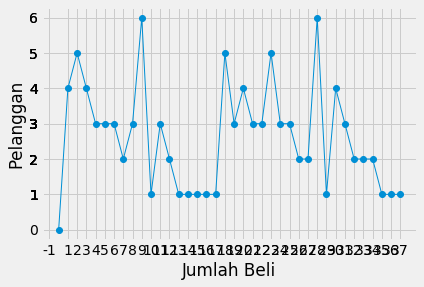

,Jumlah Beli,Cost
1,-1.0,0.0
2,1.0,4.0
3,2.0,5.0
4,3.0,4.0
5,4.0,3.0
6,5.0,3.0
7,6.0,3.0
8,7.0,2.0
9,8.0,3.0
10,9.0,6.0


In [9]:
c.execute('''select * from(select pelanggan_id, sum(jumlah_beli) as jumlah_beli from penjualan group by pelanggan_id)''')
jumlah = []
for row in c.fetchall():
    jumlah.append(row)
np_hari = np.array(jumlah)

plt.plot([str (x[0]) for x in np_hari [:,:]], [ int(x[1]) for x in np_hari[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_hari[:,:]], [ int(x[0]) for x in np_hari[:,:]])
plt.yticks([ int(x[1]) for x in np_hari[:,:]], [ int(x[1]) for x in np_hari[:,:]])
plt.xlabel('Jumlah Beli')
plt.ylabel('Pelanggan')
plt.title("")
plt.show()

df = pd.DataFrame([ x for x in np_hari[:,:]])
df.columns = ['Jumlah Beli', 'Cost']
df.index = np.arange(1,len(df)+1)
df

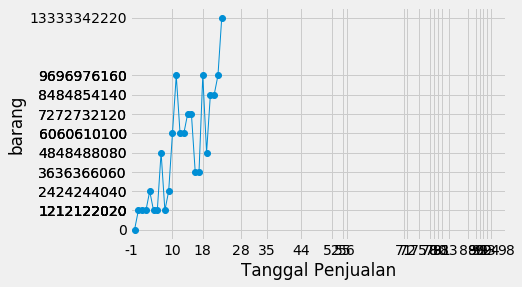

,Tanggal Penjualan,Cost
1,-1.0,0.000000e+00
2,10.0,1.212122e+09
3,18.0,1.212122e+09
4,28.0,1.212122e+09
5,35.0,2.424244e+09
6,44.0,1.212122e+09
7,52.0,1.212122e+09
8,55.0,4.848488e+09
9,56.0,1.212122e+09
10,71.0,2.424244e+09


In [10]:
c.execute('''select * from(select barang_id, sum(tanggal_penjualan) as tanggal_penjualan from penjualan group by barang_id)''')
tanggal = []
for row in c.fetchall():
    tanggal.append(row)
np_hari = np.array(tanggal)

plt.plot([str (x[0]) for x in np_hari [:,:]], [ int(x[1]) for x in np_hari[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_hari[:,:]], [ int(x[0]) for x in np_hari[:,:]])
plt.yticks([ int(x[1]) for x in np_hari[:,:]], [ int(x[1]) for x in np_hari[:,:]])
plt.xlabel('Tanggal Penjualan')
plt.ylabel('barang')
plt.title("")
plt.show()

df = pd.DataFrame([ x for x in np_hari[:,:]])
df.columns = ['Tanggal Penjualan', 'Cost']
df.index = np.arange(1,len(df)+1)
df